In [60]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
jpMap = gp.read_file("dataset/gadm36_JPN.gpkg", layer=1)
jpMap.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,JPN,Japan,JPN.1_1,Aichi,Aiti,愛知県,Ken,Prefecture,NaN,JP.AI,"MULTIPOLYGON (((137.00780 34.65997, 137.00803 ..."
1,JPN,Japan,JPN.2_1,Akita,NaN,秋田県,Ken,Prefecture,NaN,JP.AK,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ..."
2,JPN,Japan,JPN.3_1,Aomori,NaN,青森県,Ken,Prefecture,NaN,JP.AO,"MULTIPOLYGON (((140.33719 41.04913, 140.33714 ..."
3,JPN,Japan,JPN.4_1,Chiba,Tiba|Tsiba,千葉県,Ken,Prefecture,NaN,JP.CH,"MULTIPOLYGON (((139.82487 34.98967, 139.82434 ..."
4,JPN,Japan,JPN.5_1,Ehime,NaN,愛媛県,Ken,Prefecture,NaN,JP.EH,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ..."


In [62]:
jpMap.NAME_1

0         Aichi
1         Akita
2        Aomori
3         Chiba
4         Ehime
5         Fukui
6       Fukuoka
7     Fukushima
8          Gifu
9         Gunma
10    Hiroshima
11     Hokkaido
12        Hyōgo
13      Ibaraki
14     Ishikawa
15        Iwate
16       Kagawa
17    Kagoshima
18     Kanagawa
19        Kochi
20     Kumamoto
21        Kyoto
22          Mie
23       Miyagi
24     Miyazaki
25       Nagano
26     Naoasaki
27         Nara
28      Niigata
29         Oita
30      Okayama
31      Okinawa
32        Osaka
33         Saga
34      Saitama
35        Shiga
36      Shimane
37     Shizuoka
38      Tochigi
39    Tokushima
40        Tokyo
41      Tottori
42       Toyama
43     Wakayama
44     Yamagata
45    Yamaguchi
46    Yamanashi
Name: NAME_1, dtype: object

<Axes: >

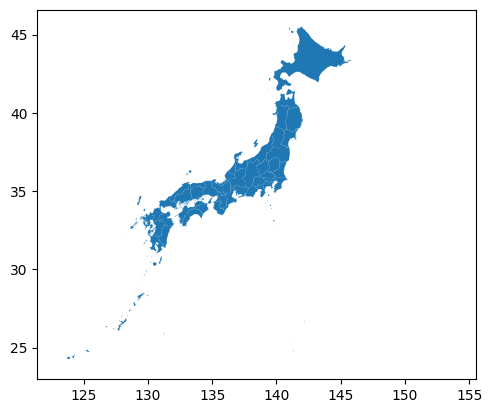

In [63]:
jpMap.plot()

In [64]:
jpMap =jpMap.rename(columns={"NAME_1":"id"})
jpMap.head()

,GID_0,NAME_0,GID_1,id,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,JPN,Japan,JPN.1_1,Aichi,Aiti,愛知県,Ken,Prefecture,NaN,JP.AI,"MULTIPOLYGON (((137.00780 34.65997, 137.00803 ..."
1,JPN,Japan,JPN.2_1,Akita,NaN,秋田県,Ken,Prefecture,NaN,JP.AK,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ..."
2,JPN,Japan,JPN.3_1,Aomori,NaN,青森県,Ken,Prefecture,NaN,JP.AO,"MULTIPOLYGON (((140.33719 41.04913, 140.33714 ..."
3,JPN,Japan,JPN.4_1,Chiba,Tiba|Tsiba,千葉県,Ken,Prefecture,NaN,JP.CH,"MULTIPOLYGON (((139.82487 34.98967, 139.82434 ..."
4,JPN,Japan,JPN.5_1,Ehime,NaN,愛媛県,Ken,Prefecture,NaN,JP.EH,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ..."


In [65]:
jpMap = jpMap.loc[: , ["id", "geometry"]]
jpMap.head()

,id,geometry
0,Aichi,"MULTIPOLYGON (((137.00780 34.65997, 137.00803 ..."
1,Akita,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ..."
2,Aomori,"MULTIPOLYGON (((140.33719 41.04913, 140.33714 ..."
3,Chiba,"MULTIPOLYGON (((139.82487 34.98967, 139.82434 ..."
4,Ehime,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ..."


In [112]:
eInfo = pd.read_csv("dataset/EarthquakeFrequency.csv")

In [113]:
eInfo

,Location of Earthquake,Frequency
0,23 wards in Tokyo,2
1,"Aizu, Fukushima Prefecture",8
2,Amakusa Sea,4
3,"Amakusa, Ashikita region, Kumamoto Prefecture",3
4,Ariake Sea,2
...,...,...
125,off the east coast of Hokkaido,4
126,off the southeast coast of Chiba Prefecture,1
127,off the southwest coast of Hokkaido,1
128,orange bay,2


In [68]:
jpMapData = pd.merge(jpMap,eInfo)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

The output of the line above will indicate that the names of the prefectures in the dataset don't match the names in the geopackage. A little string manipulation should fix it.

In [78]:
PrefNames = pd.DataFrame(jpMap)

In [79]:
PrefNames

,id,geometry
0,Aichi,"MULTIPOLYGON (((137.00780 34.65997, 137.00803 ..."
1,Akita,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ..."
2,Aomori,"MULTIPOLYGON (((140.33719 41.04913, 140.33714 ..."
3,Chiba,"MULTIPOLYGON (((139.82487 34.98967, 139.82434 ..."
4,Ehime,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ..."
5,Fukui,"MULTIPOLYGON (((136.04195 35.73417, 136.04167 ..."
6,Fukuoka,"MULTIPOLYGON (((130.47037 33.86395, 130.47119 ..."
7,Fukushima,"MULTIPOLYGON (((140.79611 36.85653, 140.79472 ..."
8,Gifu,"MULTIPOLYGON (((137.60454 35.38891, 137.59399 ..."
9,Gunma,"MULTIPOLYGON (((139.50237 36.18904, 139.49628 ..."


Check the size of each dataframe to determine which will have domain over the iteration.

In [69]:
len(PrefNames)

47

In [70]:
len(eInfo)

130

In [80]:
PrefNames

,id,geometry
0,Aichi,"MULTIPOLYGON (((137.00780 34.65997, 137.00803 ..."
1,Akita,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ..."
2,Aomori,"MULTIPOLYGON (((140.33719 41.04913, 140.33714 ..."
3,Chiba,"MULTIPOLYGON (((139.82487 34.98967, 139.82434 ..."
4,Ehime,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ..."
5,Fukui,"MULTIPOLYGON (((136.04195 35.73417, 136.04167 ..."
6,Fukuoka,"MULTIPOLYGON (((130.47037 33.86395, 130.47119 ..."
7,Fukushima,"MULTIPOLYGON (((140.79611 36.85653, 140.79472 ..."
8,Gifu,"MULTIPOLYGON (((137.60454 35.38891, 137.59399 ..."
9,Gunma,"MULTIPOLYGON (((139.50237 36.18904, 139.49628 ..."


In [142]:
eInfo

,Location of Earthquake,Frequency
0,23 wards in Tokyo,2
1,"Aizu, Fukushima Prefecture",8
2,Amakusa Sea,4
3,"Amakusa, Ashikita region, Kumamoto Prefecture",3
4,Ariake Sea,2
...,...,...
125,off the east coast of Hokkaido,4
126,off the southeast coast of Chiba Prefecture,1
127,off the southwest coast of Hokkaido,1
128,orange bay,2


Created nested loop that detects if the name of the Prefecture is mentioned in any of the lines of the csv. Created duplicate dataframe for testing of append

In [241]:
eInfoConv = {"Location of Earthquake": []}

In [242]:
for row1 in eInfo["Location of Earthquake"]:
    for row2 in PrefNames["id"]:
        if row2 in row1:
            print("Detected " + row2)
            eInfoConv["Location of Earthquake"].append(row2)

Detected Tokyo
Detected Fukushima
Detected Kumamoto
Detected Kumamoto
Detected Kochi
Detected Mie
Detected Nagano
Detected Shizuoka
Detected Tottori
Detected Yamaguchi
Detected Niigata
Detected Aichi
Detected Kanagawa
Detected Shizuoka
Detected Tokyo
Detected Yamanashi
Detected Shimane
Detected Fukushima
Detected Gifu
Detected Hokkaido
Detected Niigata
Detected Ishikawa
Detected Kagoshima
Detected Kumamoto
Detected Gifu
Detected Fukushima
Detected Nara
Detected Chiba
Detected Gunma
Detected Ibaraki
Detected Miyagi
Detected Nagano
Detected Saitama
Detected Tochigi
Detected Wakayama
Detected Iwate
Detected Akita
Detected Iwate
Detected Hiroshima
Detected Osaka
Detected Chiba
Detected Okinawa
Detected Ishikawa
Detected Miyagi
Detected Fukushima
Detected Ibaraki
Detected Iwate
Detected Niigata
Detected Aomori
Detected Chiba
Detected Fukuoka
Detected Mie
Detected Okinawa
Detected Kagoshima
Detected Fukui
Detected Kagoshima
Detected Yamagata
Detected Hyōgo
Detected Chiba
Detected Ibaraki
Det

In [243]:
eInfoConv = pd.DataFrame(data=eInfoConv)

Prints out the dataframe to ensure correct placement of prefectures that were detected

In [244]:
eInfoConv

,Location of Earthquake
0,Tokyo
1,Fukushima
2,Kumamoto
3,Kumamoto
4,Kochi
...,...
73,Tottori
74,Yamaguchi
75,Hokkaido
76,Chiba


Append the frequency of earthquakes in that area

In [259]:
for index, row in eInfoConv.iterrows():
    for index, row2 in eInfo.iterrows():
        if row["Location of Earthquake"] in row2["Location of Earthquake"]:
            eInfoConv["Frequency"] = row2["Frequency"]

In [260]:
eInfoConv

,Location of Earthquake,Frequency
0,Tokyo,1
1,Fukushima,1
2,Kumamoto,1
3,Kumamoto,1
4,Kochi,1
...,...,...
73,Tottori,1
74,Yamaguchi,1
75,Hokkaido,1
76,Chiba,1
